# __Data Visualization__

## __INT Data__

In [38]:
import glob, numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns

# Training files
files = glob.glob('../data/INT_data/INT_weather_set_parts_*')
files = sorted(files)
INT_parts = [pd.read_csv(file_path) for file_path in files]

# Concatenate the DataFrames into a single training set
INT_data = pd.concat(INT_parts, ignore_index=True)

/tmp/ipykernel_26369/97224268.py:6: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  INT_parts = [pd.read_csv(file_path) for file_path in files]
/tmp/ipykernel_26369/97224268.py:6: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  INT_parts = [pd.read_csv(file_path) for file_path in files]
/tmp/ipykernel_26369/97224268.py:6: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  INT_parts = [pd.read_csv(file_path) for file_path in files]
/tmp/ipykernel_26369/97224268.py:6: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  INT_parts = [pd.read_csv(file_path) for file_path in files]
/tmp/ipykernel_26369/97224268.py:6: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  INT_parts = [pd.read_csv(file_path) for file_path in files]
/tmp/ipyke

In [39]:
INT_data['sampletime'] = pd.to_datetime(INT_data['sampletime'])

# Extract year
INT_data['year'] = INT_data['sampletime'].dt.year

# Extract month
INT_data['month'] = INT_data['sampletime'].dt.month

# Extract day
INT_data['day'] = INT_data['sampletime'].dt.day

# Extract hour
INT_data['hour'] = INT_data['sampletime'].dt.hour

# Extract minute
INT_data['minute'] = INT_data['sampletime'].dt.minute

# Extract second
INT_data['second'] = INT_data['sampletime'].dt.second

# Drop the 'sampletime' column
INT_data.drop(columns=['sampletime'], inplace=True)

INT_data.head()

,localwindspeed,localairtemperature,localhumidity,localwetness,localbattery,year,month,day,hour,minute,second
0,35.653,4.7326,99.005,1.43,12.345,2020,6,6,9,59,59
1,23.479,4.7021,98.992,1.43,12.345,2020,6,6,10,0,5
2,35.784,4.6838,98.999,1.43,12.341,2020,6,6,10,0,11
3,28.74,4.6838,99.023,1.43,12.344,2020,6,6,10,0,17
4,28.436,4.6777,99.017,1.43,12.347,2020,6,6,10,0,23


In [40]:
# Convert the numeric values into float32
# We need to convert each category into float32
columns = INT_data.columns

# There are some missing values with '\\N' in the variables. Let's transform into an arbitrary number
for ii in columns[1:]:
    INT_data[ii][INT_data[ii] == '\\N'] = -1
    # Converting into float32
    INT_data[ii] = INT_data[ii].astype('float32')

# Converting wind speed to numeric
INT_data['localwindspeed'] = pd.to_numeric(INT_data['localwindspeed'], errors='coerce')

# Now we can count the number of NaNs in each category
print(INT_data.isna().sum())

/tmp/ipykernel_26369/2742543679.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  INT_data[ii][INT_data[ii] == '\\N'] = -1
/tmp/ipykernel_26369/2742543679.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  INT_data[ii][INT_data[ii] == '\\N'] = -1
/tmp/ipykernel_26369/2742543679.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  INT_data[ii][INT_data[ii] == '\\N'] = -1
/tmp/ipykernel_26369/2742543679.py:7: SettingWithCopyWarning: 
A

localwindspeed         1210
localairtemperature       0
localhumidity             0
localwetness              0
localbattery              0
year                      0
month                     0
day                       0
hour                      0
minute                    0
second                    0
dtype: int64


#### Mean temperature, humidity and wind speed by month

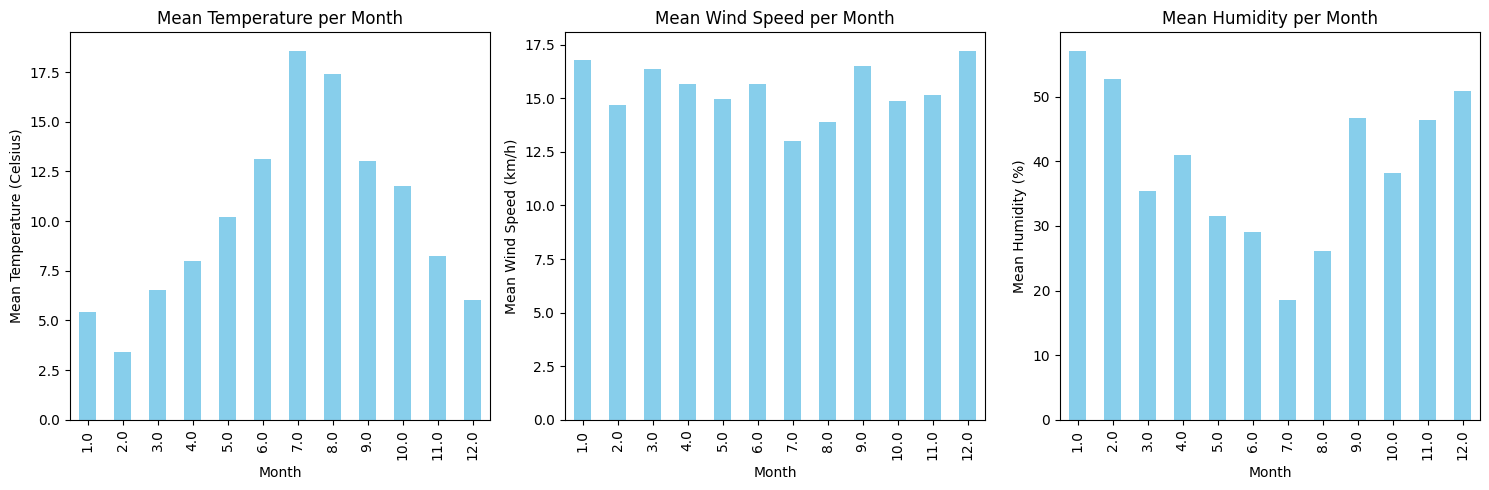

In [41]:
# Group by month and calculate mean temperature
mean_temp_per_month = INT_data.groupby('month')['localairtemperature'].mean()
mean_wind_per_month = INT_data.groupby('month')['localwindspeed'].mean()
mean_humi_per_month = INT_data.groupby('month')['localhumidity'].mean()

fig, ax = plt.subplots(1,3,figsize=(15,5))
ax = ax.ravel()

# Plotting the mean temperature per month
mean_temp_per_month.plot(kind='bar', color='skyblue', ax=ax[0])
mean_wind_per_month.plot(kind='bar', color='skyblue', ax=ax[1])
mean_humi_per_month.plot(kind='bar', color='skyblue', ax=ax[2])

ax[0].set_title('Mean Temperature per Month'); ax[1].set_title('Mean Wind Speed per Month'); ax[2].set_title('Mean Humidity per Month')
ax[0].set_xlabel('Month'); ax[1].set_xlabel('Month'); ax[2].set_xlabel('Month')
ax[0].set_ylabel('Mean Temperature (Celsius)'); ax[1].set_ylabel('Mean Wind Speed (km/h)'); ax[2].set_ylabel('Mean Humidity (%)')
#plt.xticks(rotation=45, ax=ax[0])  # Rotate x-axis labels for better readability
#ax[0].set_grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### Mean temperature, humidity and wind speed by year

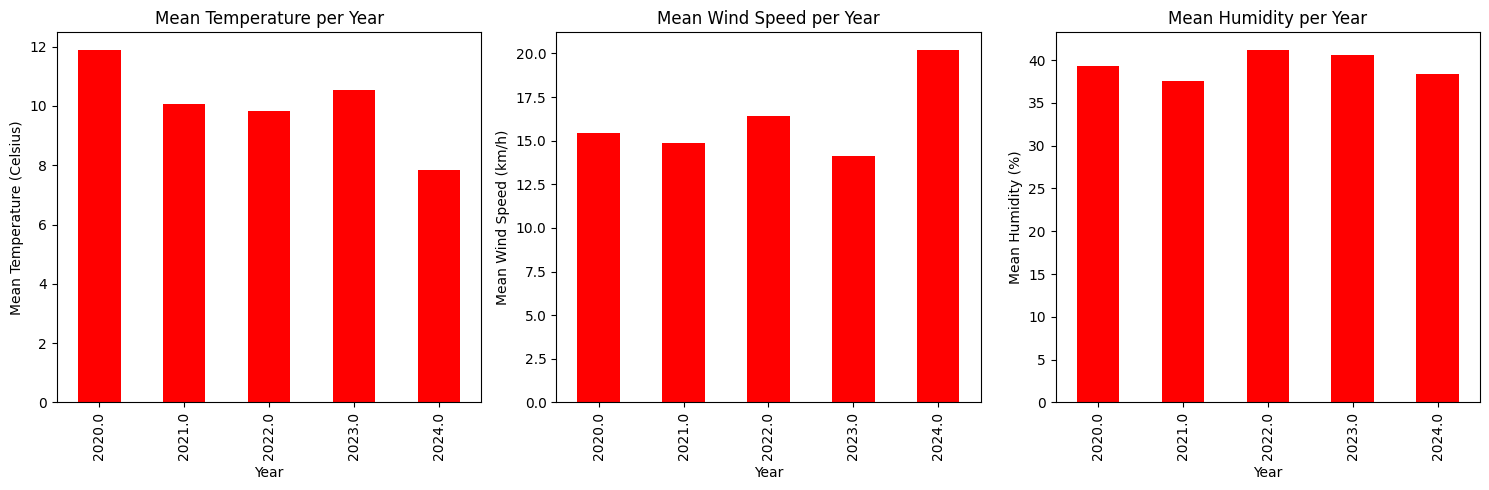

In [42]:
# Group by month and calculate mean temperature
mean_temp_per_year = INT_data.groupby('year')['localairtemperature'].mean()
mean_wind_per_year = INT_data.groupby('year')['localwindspeed'].mean()
mean_humi_per_year = INT_data.groupby('year')['localhumidity'].mean()

fig, ax = plt.subplots(1,3,figsize=(15,5))
ax = ax.ravel()

# Plotting the mean temperature per month
mean_temp_per_year.plot(kind='bar', color='red', ax=ax[0])
mean_wind_per_year.plot(kind='bar', color='red', ax=ax[1])
mean_humi_per_year.plot(kind='bar', color='red', ax=ax[2])

ax[0].set_title('Mean Temperature per Year'); ax[1].set_title('Mean Wind Speed per Year'); ax[2].set_title('Mean Humidity per Year')
ax[0].set_xlabel('Year'); ax[1].set_xlabel('Year'); ax[2].set_xlabel('Year')
ax[0].set_ylabel('Mean Temperature (Celsius)'); ax[1].set_ylabel('Mean Wind Speed (km/h)'); ax[2].set_ylabel('Mean Humidity (%)')
#plt.xticks(rotation=45, ax=ax[0])  # Rotate x-axis labels for better readability
#ax[0].set_grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## __Seeing__

In [25]:
seeing = pd.read_csv('../data/seeing_data.csv')
seeing.head()

,Date,Time,Seeing
0,2020-01-01,00:00:32,1.5096
1,2020-01-01,00:01:08,1.5786
2,2020-01-01,00:01:44,1.2777
3,2020-01-01,00:02:20,1.2360
4,2020-01-01,00:02:55,1.3859


In [29]:
# Converting to datetime
seeing['Date'] = pd.to_datetime(seeing['Date'])
seeing['Time'] = pd.to_datetime(seeing['Time'])

# Extract year
seeing['year'] = seeing['Date'].dt.year

# Extract month
seeing['month'] = seeing['Date'].dt.month

# Extract day
seeing['day'] = seeing['Date'].dt.day

# Extract hour
seeing['hour'] = seeing['Time'].dt.hour

# Extract minute
seeing['minute'] = seeing['Time'].dt.minute

# Extract second
seeing['second'] = seeing['Time'].dt.second

# Drop the 'sampletime' column
seeing.drop(columns=['Date', 'Time'], inplace=True)

seeing.head()

/tmp/ipykernel_26369/1782678562.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  seeing['Time'] = pd.to_datetime(seeing['Time'])


,Seeing,year,month,day,hour,minute,second
0,1.5096,2020,1,1,0,0,32
1,1.5786,2020,1,1,0,1,8
2,1.2777,2020,1,1,0,1,44
3,1.2360,2020,1,1,0,2,20
4,1.3859,2020,1,1,0,2,55


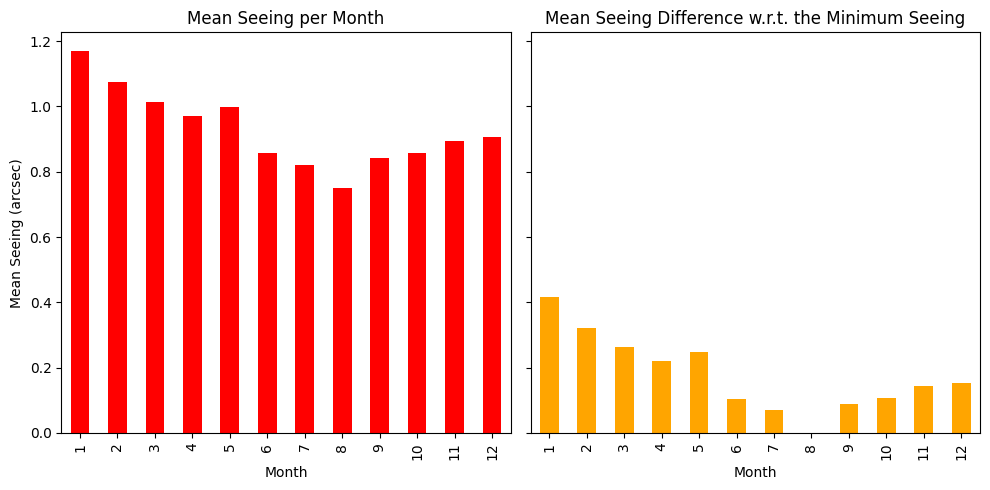

In [58]:
# Group by month and calculate mean temperature
mean_seeing_per_month = seeing.groupby('month')['Seeing'].mean()

fig, ax = plt.subplots(1,2,figsize=(10,5), sharey=True)
ax = ax.ravel()

# Plotting the mean temperature per month
mean_seeing_per_month.plot(kind='bar', color='red', ax=ax[0])
(mean_seeing_per_month - min(mean_seeing_per_month)).plot(kind='bar', color='orange', ax=ax[1])

ax[0].set_title('Mean Seeing per Month'); ax[1].set_title('Mean Seeing Difference w.r.t. the Minimum Seeing');
ax[0].set_xlabel('Month'); ax[1].set_xlabel('Month');
ax[0].set_ylabel('Mean Seeing (arcsec)'); #ax[1].set_ylabel('Mean Seeing (km/h)'); ax[2].set_ylabel('Mean Humidity (%)')
#plt.xticks(rotation=45, ax=ax[0])  # Rotate x-axis labels for better readability
#ax[0].set_grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Combined data

In [43]:
# Right join on seeing
combined = pd.merge(INT_data, seeing, on=['year', 'month', 'day', 'hour', 'minute', 'second'], how='right')

# Dropping NaNs
combined = combined.dropna()

In [50]:
combined

,localwindspeed,localairtemperature,localhumidity,localwetness,localbattery,year,month,day,hour,minute,second,Seeing
53309,31.784,7.3876,47.131001,0.0,13.107,2020.0,6.0,6.0,21.0,43.0,47.0,0.9351
53317,33.784,7.2534,50.084999,0.0,12.990,2020.0,6.0,6.0,21.0,48.0,29.0,0.7530
53323,29.740,7.2656,46.893002,0.0,12.779,2020.0,6.0,6.0,21.0,51.0,59.0,0.9164
53330,27.827,7.1862,48.834000,0.0,12.532,2020.0,6.0,6.0,21.0,56.0,5.0,0.8732
53336,28.566,7.2534,50.909000,0.0,12.416,2020.0,6.0,6.0,21.0,59.0,35.0,0.8684
...,...,...,...,...,...,...,...,...,...,...,...,...
600792,30.610,12.0380,3.192100,0.0,47.000,2024.0,2.0,20.0,23.0,29.0,29.0,0.7464
600803,31.827,12.3190,3.155500,0.0,-1.000,2024.0,2.0,20.0,23.0,35.0,59.0,1.1398
600814,33.915,12.3310,3.277500,0.0,-1.000,2024.0,2.0,20.0,23.0,42.0,29.0,1.2889
600826,30.871,12.6360,3.082200,0.0,52.000,2024.0,2.0,20.0,23.0,49.0,35.0,0.9323


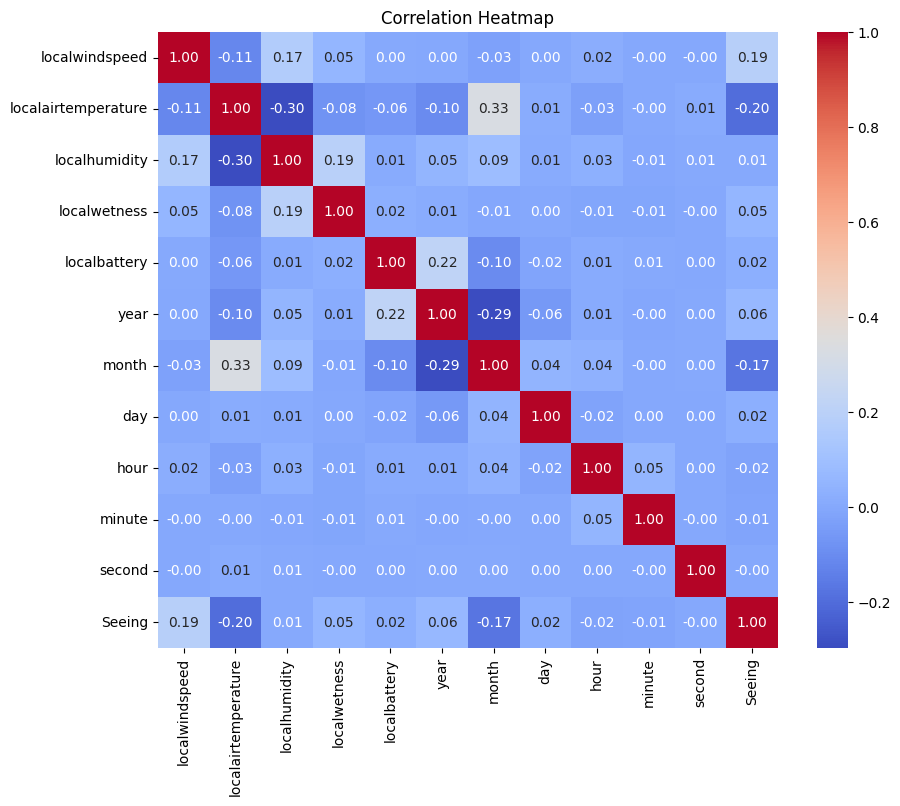

In [57]:
# Assuming combined is your DataFrame
correlation_matrix = combined.corr()

# Plotting the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap')
plt.show()